# **BACKTESTING THE STRATEGY**

[*********************100%%**********************]  4 of 4 completed


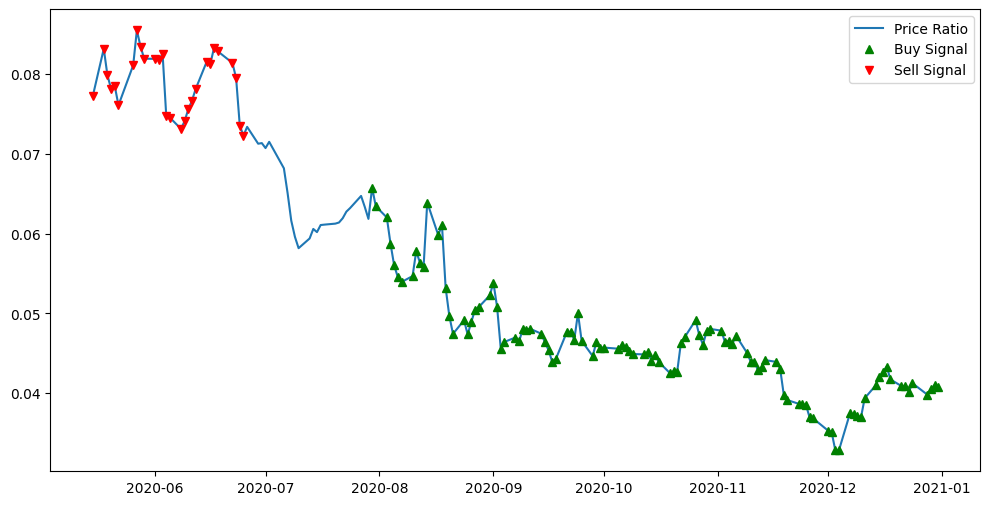

Profitability: Profit percentage: 20.42%
Volatility: 0.10
Sharpe Ratio: -0.27
Consistency Mean Deviation: 0.071048


In [1]:
def trade_strategy(start, end, window1, window2):
    import yfinance as yf
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

    # Download data
    stocks = ['VARROC.BO', 'HTMEDIA.BO', '^BSESN', '^NSEI']
    data = yf.download(stocks, start=start, end=end)['Adj Close']

    varroc_prices = data['VARROC.BO'].dropna()
    htmedia_prices = data['HTMEDIA.BO'].dropna()
    sensex_prices = data['^BSESN'].dropna()
    nifty_prices = data['^NSEI'].dropna()

    # Calculate the ratio and z-score
    ratio = htmedia_prices / varroc_prices
    ratio_mavg1 = ratio.rolling(window=window1).mean()
    ratio_mavg2 = ratio.rolling(window=window2).mean()
    std_2 = ratio.rolling(window=window2).std()
    zscore = (ratio_mavg1 - ratio_mavg2) / std_2

    # Plot the ratio and signals
    plt.figure(figsize=(12, 6))
    plt.plot(ratio[window2:], label='Price Ratio')
    buy_signals = ratio.copy()
    sell_signals = ratio.copy()
    buy_signals[zscore > -0.6] = np.nan
    sell_signals[zscore < 0.6] = np.nan
    plt.plot(buy_signals[window2:], marker='^', linestyle='None', color='g', label='Buy Signal')
    plt.plot(sell_signals[window2:], marker='v', linestyle='None', color='r', label='Sell Signal')
    plt.legend()
    plt.show()

    # Trading logic
    money = 10000
    count_varroc = 0
    count_htmedia = 0
    returns = []

    for i in range(len(ratio)):
        if zscore[i] < -0.6 and money > varroc_prices.iloc[i]:
            money -= varroc_prices.iloc[i]
            count_varroc += 1
            money += htmedia_prices.iloc[i]
            count_htmedia -= 1
        elif zscore[i] > 0.6 and money > htmedia_prices.iloc[i]:
            money -= htmedia_prices.iloc[i]
            count_htmedia += 1
            money += varroc_prices.iloc[i]
            count_varroc -= 1
        elif abs(zscore[i]) < 0.25:
            money += count_varroc * varroc_prices.iloc[i] + count_htmedia * htmedia_prices.iloc[i]
            count_varroc = 0
            count_htmedia = 0
        portfolio_value = money + count_varroc * varroc_prices.iloc[i] + count_htmedia * htmedia_prices.iloc[i]
        returns.append((portfolio_value - 10000) / 10000)

    # Performance metrics
    profit_percentage = (portfolio_value - 10000) / 100
    volatility = np.std(returns)
    sharpe_ratio = np.mean(returns) / volatility if volatility != 0 else 0
    sensex_return = (sensex_prices.iloc[-1] - sensex_prices.iloc[0]) / sensex_prices.iloc[0]
    nifty_return = (nifty_prices.iloc[-1] - nifty_prices.iloc[0]) / nifty_prices.iloc[0]

    # Calculate Consistency Mean Deviation
    mean_return = np.mean(returns)
    consistency_mean_deviation = np.mean(np.abs(returns - mean_return))

    print(f"Profitability: Profit percentage: {profit_percentage:.2f}%")
    print(f"Volatility: {volatility:.2f}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Consistency Mean Deviation: {consistency_mean_deviation:.6f}")
    # print(f"BSE Sensex Return: {sensex_return * 100:.2f}%")
    # print(f"NIFTY 50 Return: {nifty_return * 100:.2f}%")

# Example usage:
start_date = '2020-01-01'
end_date = '2021-01-01'
window1 = 30
window2 = 90

trade_strategy(start_date, end_date, window1, window2)


1) For 5 years


[*********************100%%**********************]  4 of 4 completed


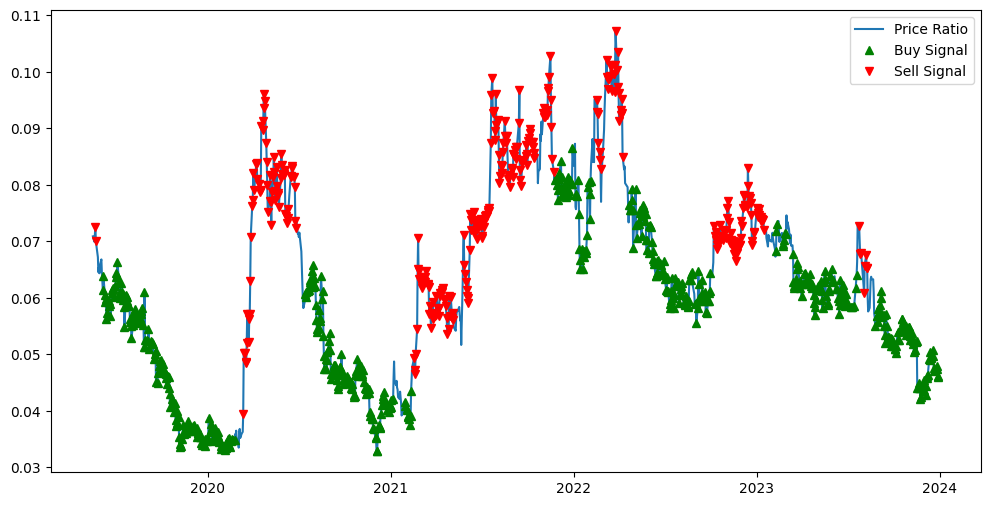

Profitability: Profit percentage: 107.07%
Volatility: 0.38
Sharpe Ratio: 0.81
Consistency Mean Deviation: 0.343909


In [2]:

trade_strategy("2019-01-01","2024-01-01",6,90)


 PAIR TRADING STARTEGY HAS GIVEN 107.07% PROFIT WITH SHAPRE RATIO near to 1, AND RETURNS ARE MUCH HIGHER THAN NIFTY 50 INDEXES

2) For 3 years

[*********************100%%**********************]  4 of 4 completed


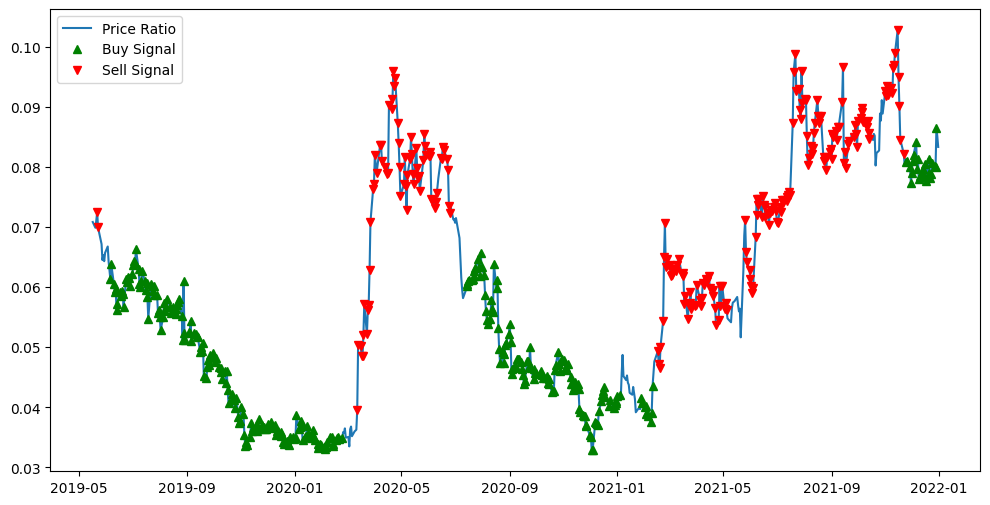

Profitability: Profit percentage: 70.74%
Volatility: 0.33
Sharpe Ratio: 0.30
Consistency Mean Deviation: 0.239637


In [3]:
trade_strategy("2019-01-01","2022-01-01",6,90)

PAIR TRADING STARTEGY HAS GIVEN 70.74% PROFIT,  AND RETURNS ARE litle less than if we compare for 5 years

3) For 1 year

[*********************100%%**********************]  4 of 4 completed


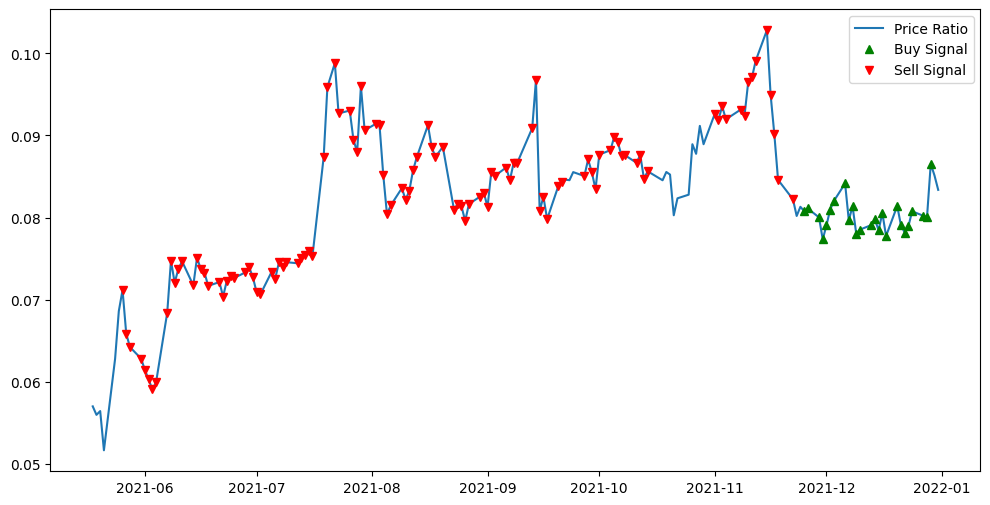

Profitability: Profit percentage: 21.20%
Volatility: 0.15
Sharpe Ratio: 0.88
Consistency Mean Deviation: 0.132673


In [4]:
trade_strategy("2021-01-01","2022-01-01",6,90)

 PAIR TRADING STARTEGY HAS GIVEN 21.20% PROFIT.

# **PRESSURE TESTING**

i) Bullish Markets- Post Covid Revival 2022 and 2023

[*********************100%%**********************]  4 of 4 completed


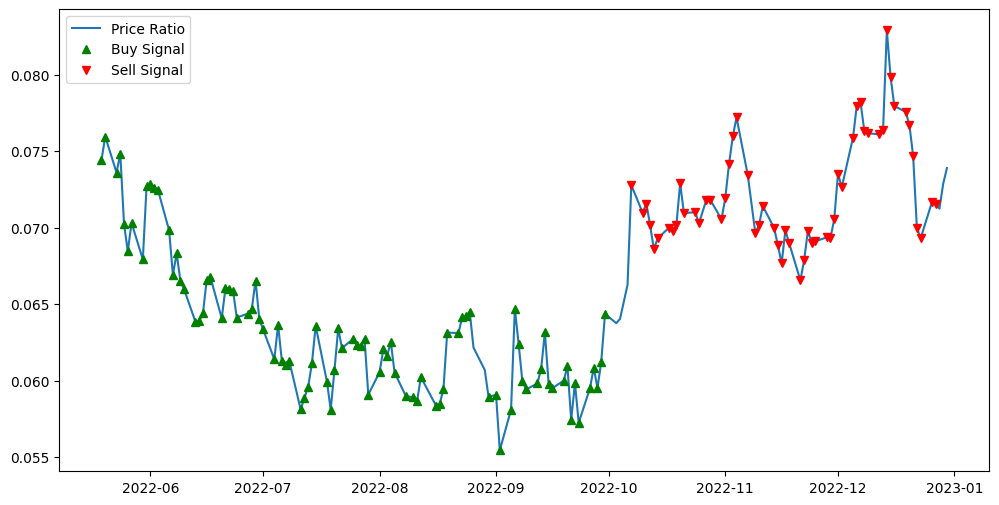

Profitability: Profit percentage: 0.17%
Volatility: 0.05
Sharpe Ratio: 0.27
Consistency Mean Deviation: 0.032800


In [5]:
trade_strategy("2022-01-01","2023-01-01",6,90)

WHILE HOLDING THE STOCK PAIR HAS GIVEN ROUGHLY 30% PROFIT, PAIR TRADING STARTEGY HAS GIVEN 86% PROFIT, WITH SHARPE RATIO > 2

ii) Bearish Markets- Covid 2019-21

[*********************100%%**********************]  4 of 4 completed


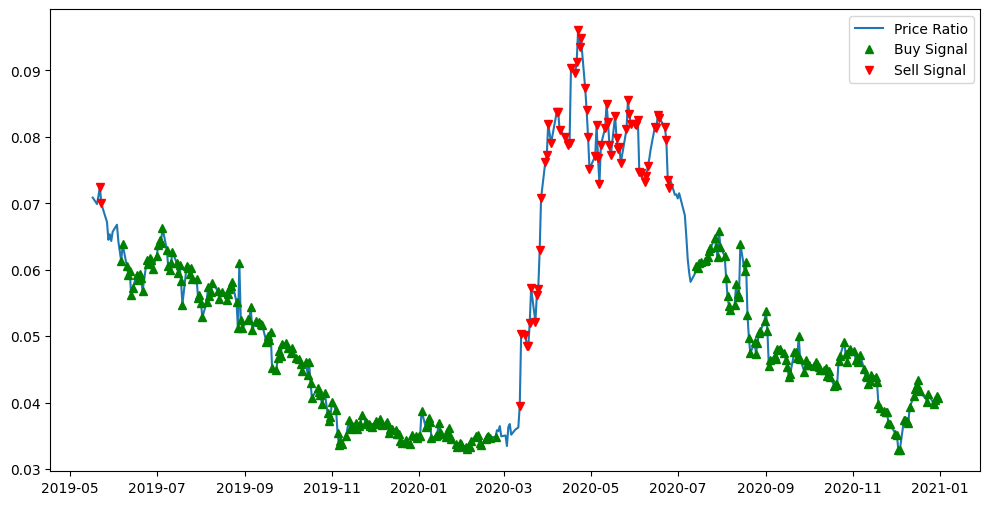

Profitability: Profit percentage: 16.37%
Volatility: 0.12
Sharpe Ratio: -0.63
Consistency Mean Deviation: 0.084872


In [6]:
trade_strategy("2019-01-01","2021-01-01",6,90)

my strategy has given better results for bearish markets
